**XYZ Pharma company wanted to build machine learning model to predict which drug type is good for the patient based on the patient details**

In this project, U have used following classsification algorithm

KNN Algorithm

Decision Tree Classification

Support Vector Machine

Random Forest

Gaussian Naive Bayes

Stochastic Gradient Descent

Linear SVC


In [1]:
import numpy as np # Linear Algebra
import pandas as pd # Data processing, CSV file


In [2]:
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# for machin learning
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing



# **Loading and Exploring Data**

In [7]:
data = pd.read_csv('/content/drug200.csv')

**Data Size and Structure**

In [8]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Features In Data

In [10]:
print('='*50)
print('Columns in data')
print('='*50)
print(data.columns.values)

Columns in data
['Age' 'Sex' 'BP' 'Cholesterol' 'Na_to_K' 'Drug']


**The target featre is drug type**

**The feature sets are:**

age : Age of patient

Sex : Sex/Gender of patient

Blood Pressure Levels("BP")

Cholestrol Level

Na to Potassium Ration

---



In [11]:
print('='*20)
print("Data Shape")
print('='*20)
print('='*20)
print(data.shape)

Data Shape
(200, 6)


**The data contains 200 samples**

# New section
Descriptive Statistics

In [12]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [13]:
print('='*50)
print("\nData Information")
print('='*50)
print(data.info())


Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [19]:
# lets check the correlation
# Drop non-numeric columns before calculating correlation
numeric_data = data.drop(['Sex', 'BP', 'Cholesterol', 'Drug'], axis=1)
print(numeric_data.corr())

              Age   Na_to_K
Age      1.000000 -0.063119
Na_to_K -0.063119  1.000000


In [22]:
#lets check the covarriance
# Droip non-numeric columns before calculating correlation
numeric_data = data.drop(['Sex', 'BP', 'Cholesterol', 'Drug'], axis=1)
print(numeric_data.cov())

                Age    Na_to_K
Age      273.714347  -7.543752
Na_to_K   -7.543752  52.185533


In [25]:
# droping the null values
data.isnull().any()

,0
Age,False
Sex,False
BP,False
Cholesterol,False
Na_to_K,False
Drug,False


## Exploring drug features and realtion with target

 The class Variable; Drug Type

<Axes: xlabel='Drug', ylabel='count'>

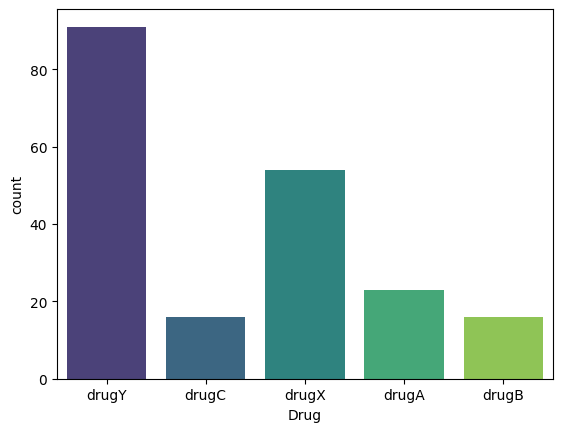

In [30]:
sns.countplot(x='Drug', data=data, palette='viridis')

**Sex/Gender**

In [31]:
data['Sex'].value_counts()

,count
Sex,
M,104
F,96


In [37]:
df = pd.DataFrame(data.groupby(['Sex','Drug'])['Drug'].size())
df

Drug
Sex Drug       
F   drugA     9
    drugB     6
    drugC     7
    drugX    27
    drugY    47
M   drugA    14
    drugB    10
    drugC     9
    drugX    27
    drugY    44

<Axes: xlabel='Sex', ylabel='count'>

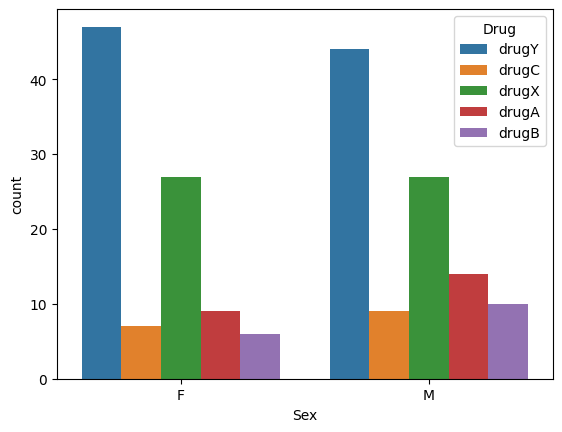

In [38]:
sns.countplot(x='Sex', hue='Drug', data=data)

In [39]:
data['BP'].value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [45]:
df = pd.DataFrame(data.groupby(['BP', 'Drug'])['Drug'].count())
df

Drug
BP     Drug       
HIGH   drugA    23
       drugB    16
       drugY    38
LOW    drugC    16
       drugX    18
       drugY    30
NORMAL drugX    36
       drugY    23

<Axes: xlabel='BP', ylabel='count'>

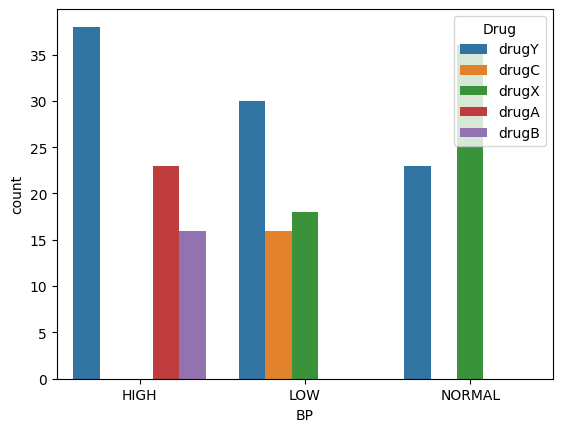

In [46]:
sns.countplot(x='BP', hue='Drug', data=data)

In [47]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
